In [ ]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select

import pandas as pd
import pickle
import os
import sys
import warnings
import time

from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}


from selenium.webdriver.edge.options import Options

edge_options = Options()
#edge_options.add_argument('--headless')
edge_options.add_argument("--disable-images")  # Disable images
edge_options.add_argument("--disable-javascript")  # Disable JavaScript
edge_options.add_argument("--disable-plugins")  # Disable plugins
edge_options.add_argument("--disable-extensions")  # Disable extensions
edge_options.add_argument("--blink-settings=imagesEnabled=false")  # Another image disabling flag


# Set a minimal User-Agent (like a text-only browser)
edge_options.add_argument("user-agent=Links (2.25; Linux 2.4.24)")

driver = webdriver.Edge(options=edge_options)
#driver.execute_cdp_cmd("Network.setBlockedURLs", {"urls": ["*.jpg", "*.png", "*.gif","*.svg"]})
#driver.execute_cdp_cmd("Network.enable", {})


driver.maximize_window()

driver.execute_script("document.body.style.zoom='67%'")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
driver.get('https://www.dday.org/learn/necrology-project/')

In [4]:
driver.find_element(By.CSS_SELECTOR, 'div[class="dataTables_length"]').click()

In [7]:
driver.find_element(By.CSS_SELECTOR, 'li[data-original-index="6"][role="option"]').click()

In [8]:
time.sleep(30)

In [ ]:
html=driver.page_source
soup=BeautifulSoup(html)

In [30]:
trs=soup.select('tr[class="even"], tr[class="odd"]')

In [38]:
rows=[]
for tr in trs:
    tds=[cell.text for cell in tr.select('td')]
    rows.append(tds)
    

In [44]:
df=pd.DataFrame(rows)
columns=[col.text.strip() for col in soup.select('th[aria-controls="table_1"]')]
df.columns=columns

In [ ]:
#df.to_csv('D-Day casualties.csv',index=False)

In [7]:
df=pd.read_csv("D-Day casualties.csv")

In [8]:
df=df.replace('',None)

In [9]:
df

,Photo,Last Name,First Name,Middle Name,Suffix,Service #,Allied Nation Served,State/Province,Branch,Division,Unit,Rank,Beach,Burial Place,Plaque #,Banner ID
0,NaN,Aalstad,Einar,NaN,NaN,NaN,Norway,NaN,Royal Norwegian Navy,NaN,"Destroyer ""Svenner""",Mar Deck Hand,NaN,* UNKNOWN * Please contact NDDMF if able to su...,E-16,NaN
1,NaN,Aanonsen,Robert,H.,Jr.,3768254,USA,California,Navy,NaN,Tide AM 125,Motor Machinist's Mate 2nd Class,NaN,"Cypress Lawn Cemetery, Colma, CA",W-65,NaN
2,NaN,Aas,Harald,Hansen,NaN,NaN,Norway,NaN,Royal Norwegian Navy,NaN,"Destroyer ""Svenner""",Mar Petty Officer II,NaN,* UNKNOWN * Please contact NDDMF if able to su...,E-47,NaN
3,NaN,Abbott,Leslie,C.,Jr.,2036321,USA,Virginia,Army,29th Infantry Division,"116th Infantry Regiment, Co. A",Staff Sergeant,Omaha,"Oakwood Cemetery, Bedford, VA",W-3,F-12
4,NaN,Abell,Eric,Evan,NaN,6016672,United Kingdom,NaN,Army,50th (Northumbrian) Infantry Division,1st Battalion Dorsetshire Regiment,Lance Serjeant,Gold,"Bayeux War Cemetery, Calvados",E-38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,NaN,Zoeller,Adolph,NaN,NaN,16053931,USA,Illinois,Army,NaN,"741st Tank Battalion, Co. C",Corporal,Omaha,"Maplewood Cemetery, Marion, IL",W-101,F-1
4423,NaN,Zukowski,Joseph,NaN,NaN,12022921,USA,New York,Army,1st Infantry Division,"16th Infantry Regiment, Co. F",Sergeant,Omaha,Normandy American Cemetery,W-28,F-13
4424,NaN,Zuniga,Salvador,Joseph,NaN,39268588,USA,California,Army Air Corps,344th Bomber Group,497th Bomber Squadron,Staff Sergeant,NaN,"Holy Cross Cemetery, San Diego, CA",W-112,NaN
4425,NaN,Zussa,Alfred,M.,NaN,16128573,USA,Illinois,Army Air Corps,394th Bomber Group,587th Bomber Squadron,Sergeant,NaN,"Holy Sepulchre Cemetery, Alsip, IL",W-58,F-1


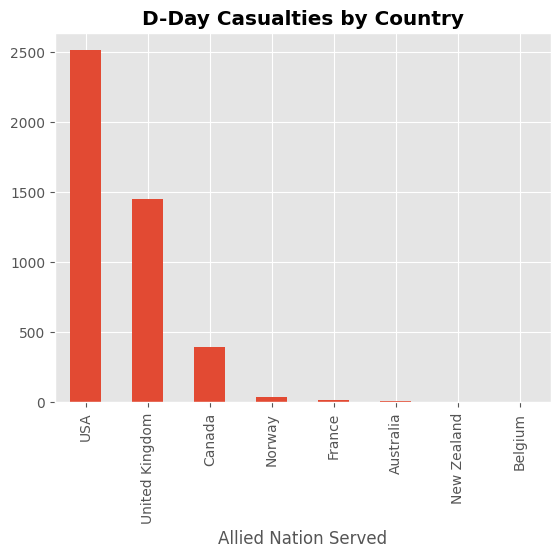

In [10]:
df['Allied Nation Served'].value_counts(normalize=False).plot.bar()
plt.title('D-Day Casualties by Country',fontweight='bold')
plt.show()

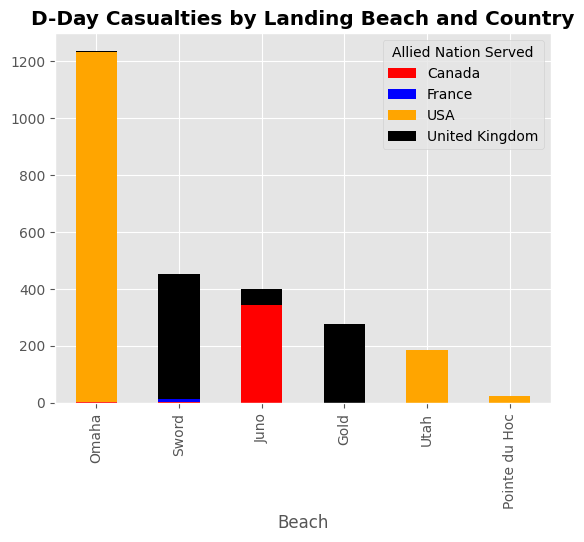

In [11]:
grouped=df.groupby(['Allied Nation Served', 'Beach']).size().reset_index(name='count')
pivoted = grouped.pivot(columns='Allied Nation Served', index='Beach', values='count')
pivoted['total']=pivoted.sum(axis=1)
pivoted = pivoted.sort_values(by='total', ascending=False).drop(columns='total')

pivoted.plot(kind='bar', stacked=True, color=['red', 'blue', 'orange', 'black'])
plt.title('D-Day Casualties by Landing Beach and Country',fontweight='bold')
plt.show()

In [12]:
df['Unit'].value_counts().head(20)
#casualties by unit

Unit
116th Infantry Regiment, Co. A               105
116th Infantry Regiment, Co. B                69
7th Battalion Parachute Regiment              66
1st Battalion Hampshire Regiment              62
Royal Winnipeg Rifles                         57
2nd Battalion East Yorkshire Regiment         56
16th Infantry Regiment, Co. E                 48
48 RM Commando                                44
1st Battalion South Lancashire Regiment       43
Regina Rifle Regiment                         42
9th Battalion Parachute Regiment              39
8th Battalion Parachute Regiment              39
116th Infantry Regiment, Co. D                37
1st Battalion Dorsetshire Regiment            37
501st Parachute Infantry Regiment, Co. G      36
29th Field Artillery Battalion, Battery B     36
506th Parachute Infantry Regiment, Co. I      34
Destroyer "Svenner"                           33
Queen's Own Rifles of Canada, B Coy           32
16th Infantry Regiment, Co. F                 31
Name: count, dt